<a href="https://colab.research.google.com/github/inesluparia/ML/blob/master/WinePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score

import tensorflow as tf
from numpy import argmax


In [64]:
!git clone https://github.com/inesluparia/ML.git

fatal: destination path 'ML' already exists and is not an empty directory.


In [65]:
dataFrame = pd.read_csv('ML/winequalityN.csv')
#source https://www.kaggle.com/yasserh/wine-quality-dataset

In [66]:
dataFrame.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [67]:
dataFrame.isnull().sum()
dataFrame.dropna(inplace=True)

In [68]:
pd.set_option('display.max_columns', None) # print all columns
X = dataFrame.iloc[:, 0:-1] # select relevant rows and columns to X
y = dataFrame.iloc[:, -1] # select column(s) for y (here only the last column)

In [69]:
#print(X.iloc[0:5,:])
#print(y.iloc[0:5])

In [70]:
X = pd.get_dummies(X) #WILL CONVERT RED/WHITE TO HOT ENCODING
columnNames = list(X.columns) #SAVE NAMES BEFORE CONVERTUNG TO NP ARRAY

In [71]:
print(X.iloc[0:5,:])
print(y.iloc[0:1])

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  type_red  type_white  
0      8.8         0           1  
1      9.5      

In [72]:
X = X.values # convert from Pandas dataframe to numpy array
y = y.values

In [73]:
print(X[0:5,:])

[[7.000e+00 2.700e-01 3.600e-01 2.070e+01 4.500e-02 4.500e+01 1.700e+02
  1.001e+00 3.000e+00 4.500e-01 8.800e+00 0.000e+00 1.000e+00]
 [6.300e+00 3.000e-01 3.400e-01 1.600e+00 4.900e-02 1.400e+01 1.320e+02
  9.940e-01 3.300e+00 4.900e-01 9.500e+00 0.000e+00 1.000e+00]
 [8.100e+00 2.800e-01 4.000e-01 6.900e+00 5.000e-02 3.000e+01 9.700e+01
  9.951e-01 3.260e+00 4.400e-01 1.010e+01 0.000e+00 1.000e+00]
 [7.200e+00 2.300e-01 3.200e-01 8.500e+00 5.800e-02 4.700e+01 1.860e+02
  9.956e-01 3.190e+00 4.000e-01 9.900e+00 0.000e+00 1.000e+00]
 [7.200e+00 2.300e-01 3.200e-01 8.500e+00 5.800e-02 4.700e+01 1.860e+02
  9.956e-01 3.190e+00 4.000e-01 9.900e+00 0.000e+00 1.000e+00]]


In [74]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
#no need to scale y values!

In [75]:
print(X[0:5,:])
print(y[0:5])

[[-0.16778609 -0.42270958  0.2839587   3.20742026 -0.31522756  0.81560932
   0.96077916  2.09992631 -1.35916011 -0.5449872  -1.41892232 -0.5719307
   0.5719307 ]
 [-0.70715516 -0.2404789   0.14625658 -0.80815119 -0.20118008 -0.93013767
   0.28847889 -0.23246533  0.50839916 -0.27635393 -0.83218392 -0.5719307
   0.5719307 ]
 [ 0.67979387 -0.36196602  0.55936296  0.30611733 -0.17266821 -0.02910697
  -0.33074505  0.13405336  0.25939126 -0.61214551 -0.32926528 -0.5719307
   0.5719307 ]
 [-0.01368064 -0.66568383  0.00855445  0.64250028  0.05542676  0.92823815
   1.24385296  0.30065276 -0.17637257 -0.88077878 -0.49690483 -0.5719307
   0.5719307 ]
 [-0.01368064 -0.66568383  0.00855445  0.64250028  0.05542676  0.92823815
   1.24385296  0.30065276 -0.17637257 -0.88077878 -0.49690483 -0.5719307
   0.5719307 ]]
[6 6 6 6 6]


In [76]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=2222 )

In [77]:
print(y[:5])

[6 6 6 6 6]


In [78]:
model = Sequential()
model.add(Dense(13,activation='relu')) # It will automatically adapt to number inputs
#model.add(Dense(13,activation='relu'))
model.add(Dense(1)) # Final output node for prediction. In this case, only one output neuron

adam = Adam(learning_rate=0.001) 
model.compile(loss='mse', optimizer=adam)


In [79]:
model.fit(X_train,y_train,epochs=50, verbose=1)  # does the actual WORK !. verbose=1 will show output. 0 = no output.


Epoch 1/50
162/162 [==============================] - 1s 2ms/step - loss: 20.7265
Epoch 2/50
162/162 [==============================] - 0s 2ms/step - loss: 5.4923
Epoch 3/50
162/162 [==============================] - 0s 2ms/step - loss: 2.3410
Epoch 4/50
162/162 [==============================] - 0s 2ms/step - loss: 1.7844
Epoch 5/50
162/162 [==============================] - 0s 2ms/step - loss: 1.4742
Epoch 6/50
162/162 [==============================] - 0s 2ms/step - loss: 1.2628
Epoch 7/50
162/162 [==============================] - 0s 2ms/step - loss: 1.1040
Epoch 8/50
162/162 [==============================] - 0s 2ms/step - loss: 0.9780
Epoch 9/50
162/162 [==============================] - 0s 2ms/step - loss: 0.8755
Epoch 10/50
162/162 [==============================] - 0s 2ms/step - loss: 0.7953
Epoch 11/50
162/162 [==============================] - 0s 2ms/step - loss: 0.7346
Epoch 12/50
162/162 [==============================] - 0s 2ms/step - loss: 0.6894
Epoch 13/50
162/162 [===

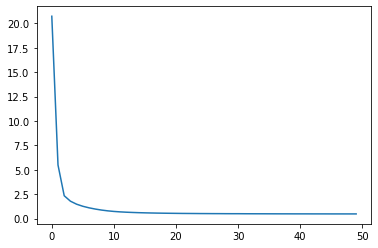

In [80]:
loss = model.history.history['loss']
sns.lineplot(x=range(len(loss)),y=loss)

In [81]:
model.evaluate(X_test,y_test,verbose=1)

41/41 [==============================] - 0s 1ms/step - loss: 0.4731


0.47314444184303284